In [22]:
# Import libraries for data manipulation, visualization, and modeling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
# Load the insurance dataset
insurance_data = pd.read_csv("C:/Users/shubhankan shinde/Desktop/Machine learning/insurance.csv")

# Display the first few rows
insurance_data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# Check for null values and data types
insurance_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# Get summary statistics of numerical columns
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
# 4. Check for missing values
print("\nMissing Values in Each Column:")
print(insurance_data.isnull().sum())


Missing Values in Each Column:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [8]:
print(insurance_data['sex'].unique())
print(insurance_data['smoker'].unique())
print(insurance_data['region'].unique())

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


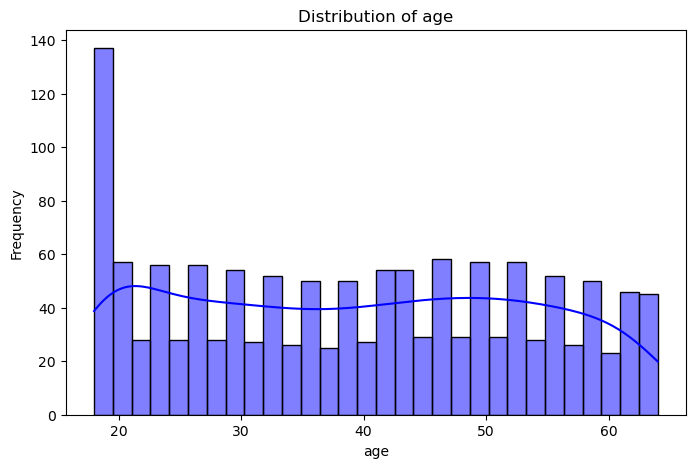

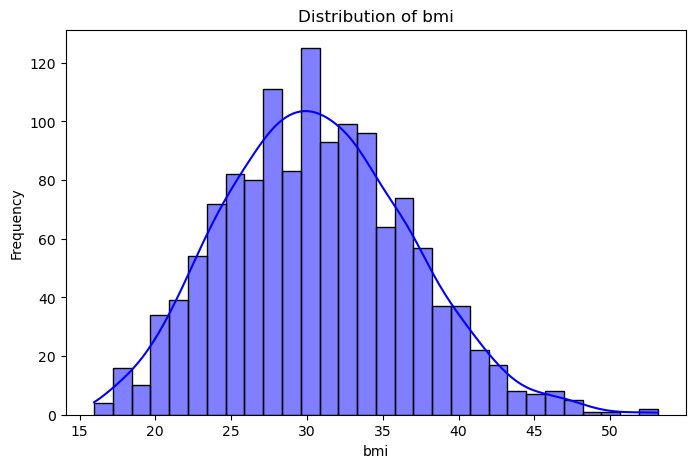

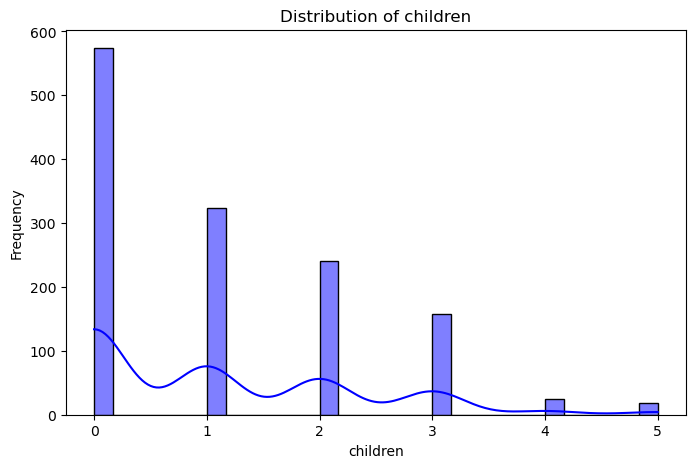

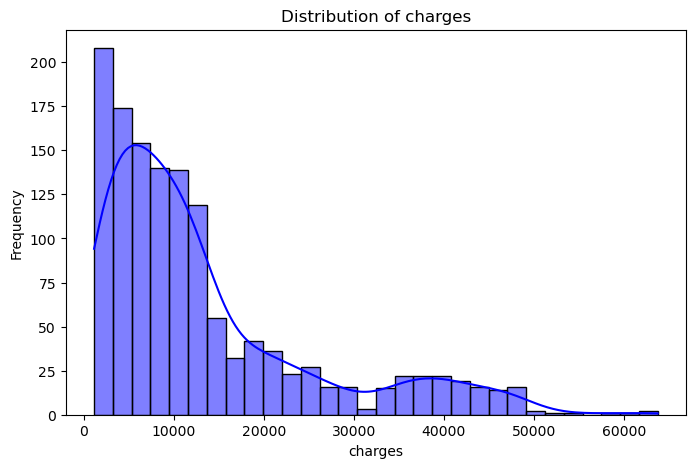

In [4]:
# 1. Distribution of numerical features
numerical_features = ['age', 'bmi', 'children', 'charges']
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(insurance_data[feature], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

C:\Users\shubhankan shinde\AppData\Local\Temp\ipykernel_29804\2210623428.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=insurance_data, x=feature, y='charges', palette='viridis')


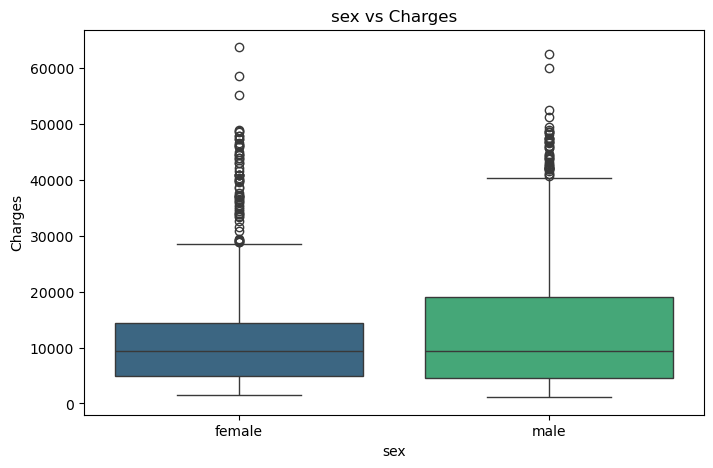

C:\Users\shubhankan shinde\AppData\Local\Temp\ipykernel_29804\2210623428.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=insurance_data, x=feature, y='charges', palette='viridis')


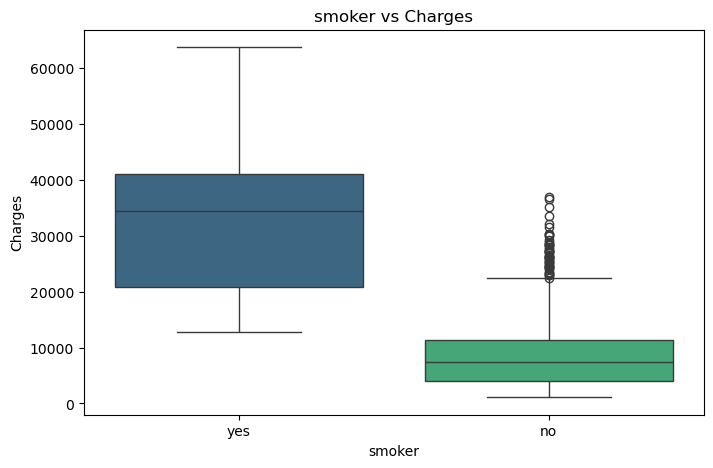

C:\Users\shubhankan shinde\AppData\Local\Temp\ipykernel_29804\2210623428.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=insurance_data, x=feature, y='charges', palette='viridis')


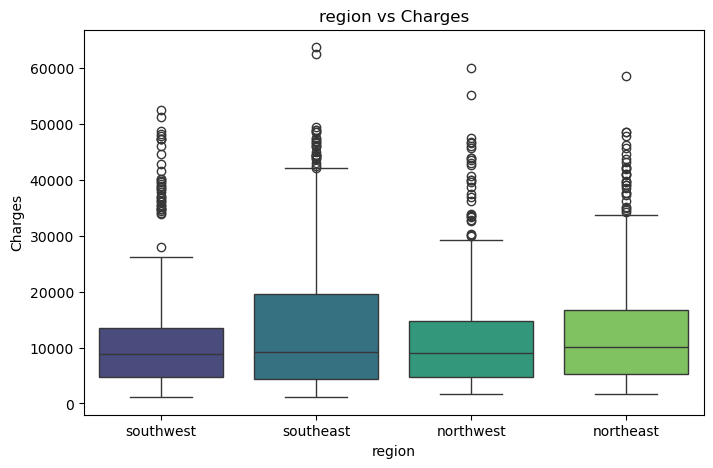

In [5]:
# 2. Boxplot for categorical variables vs charges
categorical_features = ['sex', 'smoker', 'region']
for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=insurance_data, x=feature, y='charges', palette='viridis')
    plt.title(f'{feature} vs Charges')
    plt.xlabel(feature)
    plt.ylabel('Charges')
    plt.show()


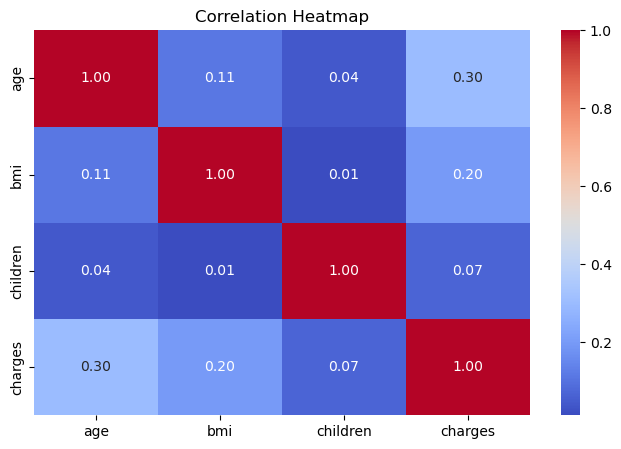

In [7]:
# 3. Correlation heatmap (only numerical columns)
plt.figure(figsize=(8, 5))

# Select only numerical columns
numerical_data = insurance_data.select_dtypes(include=['number'])
correlation_matrix = numerical_data.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


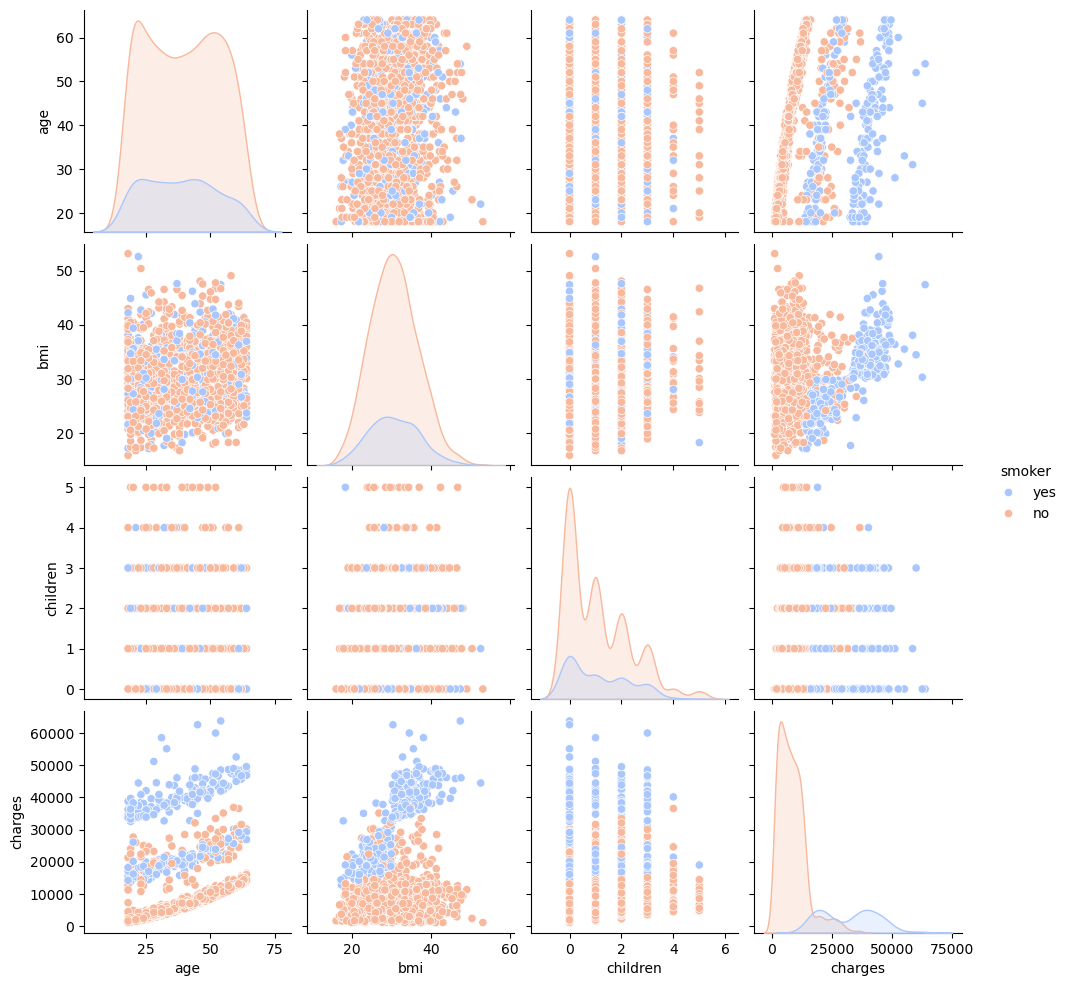

In [8]:
# 4. Pairplot for key relationships
sns.pairplot(insurance_data, hue='smoker', diag_kind='kde', palette='coolwarm')
plt.show()


In [9]:
print(insurance_data.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [11]:
# Select only numerical columns
numerical_data = insurance_data.select_dtypes(include=['number'])

# Compute the correlation matrix
print(numerical_data.corr())

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


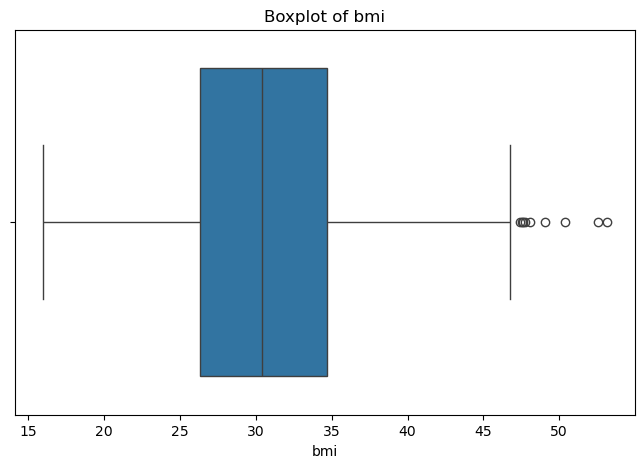

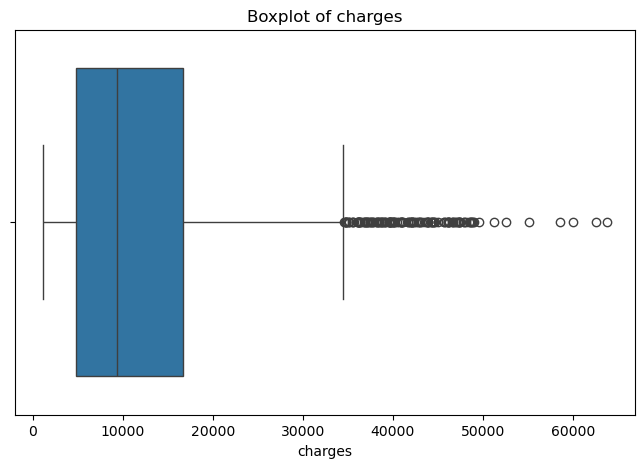

In [12]:
# Boxplot to identify outliers in 'bmi' and 'charges'
import seaborn as sns
import matplotlib.pyplot as plt

for feature in ['bmi', 'charges']:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=insurance_data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()


Outliers in 'bmi' capped.
Outliers in 'charges' capped.


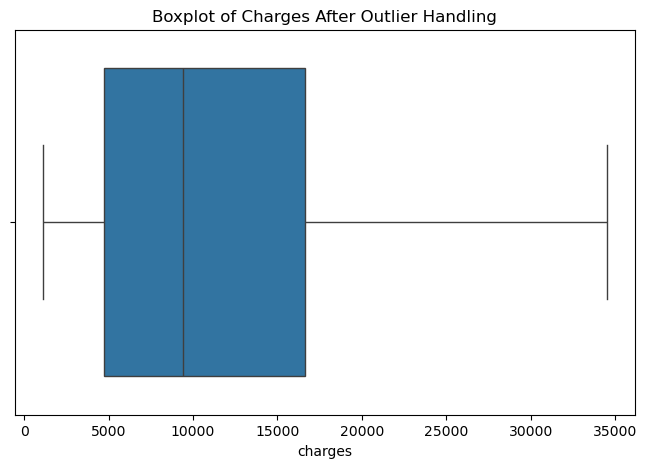

In [14]:
# Detect and handle outliers for 'bmi' and 'charges' using IQR
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] > upper_bound, upper_bound, 
                          np.where(df[column] < lower_bound, lower_bound, df[column]))
    print(f"Outliers in '{column}' capped.")

# Apply outlier handling
handle_outliers(insurance_data, 'bmi')
handle_outliers(insurance_data, 'charges')

# Boxplot after handling outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=insurance_data['charges'])
plt.title("Boxplot of Charges After Outlier Handling")
plt.show()


In [30]:
# Split data into features and target
X = insurance_data.drop('charges', axis=1)
y = insurance_data['charges']

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'bmi', 'children']),  # Scaling numerical features
        ('cat', OneHotEncoder(), ['sex', 'smoker', 'region'])  # Encoding categorical features
    ])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data successfully split into training and testing sets.")


Data successfully split into training and testing sets.


In [31]:
# Linear Regression Pipeline
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
lr_pipeline.fit(X_train, y_train)

# Random Forest Pipeline
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])
rf_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat', OneHotEncoder(),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [26]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid for Random Forest
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5, 10]
}

# Grid Search with Random Forest pipeline
grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and model performance
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation R² Score:", grid_search.best_score_)

# Retrain Random Forest with Best Parameters
rf_pipeline.set_params(**grid_search.best_params_)
rf_pipeline.fit(X_train, y_train)


Best Parameters: {'regressor__max_depth': 10, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 100}
Best Cross-Validation R² Score: 0.799681815896561


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat', OneHotEncoder(),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('regressor',
                 RandomForestRegressor(max_depth=10, min_samples_split=10,
                                       random_state=42))])

In [32]:
# Evaluate Linear Regression
lr_predictions = lr_pipeline.predict(X_test)
print("Linear Regression Performance:")
print(f"MAE: {mean_absolute_error(y_test, lr_predictions):.2f}")
print(f"MSE: {mean_squared_error(y_test, lr_predictions):.2f}")
print(f"R^2: {r2_score(y_test, lr_predictions):.2f}")

# Evaluate Random Forest
rf_predictions = rf_pipeline.predict(X_test)
print("\nRandom Forest Performance:")
print(f"MAE: {mean_absolute_error(y_test, rf_predictions):.2f}")
print(f"MSE: {mean_squared_error(y_test, rf_predictions):.2f}")
print(f"R^2: {r2_score(y_test, rf_predictions):.2f}")


Linear Regression Performance:
MAE: 3316.73
MSE: 23437328.29
R^2: 0.78

Random Forest Performance:
MAE: 2199.23
MSE: 18394112.51
R^2: 0.83


C:\Users\shubhankan shinde\AppData\Local\Temp\ipykernel_29804\1202173585.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


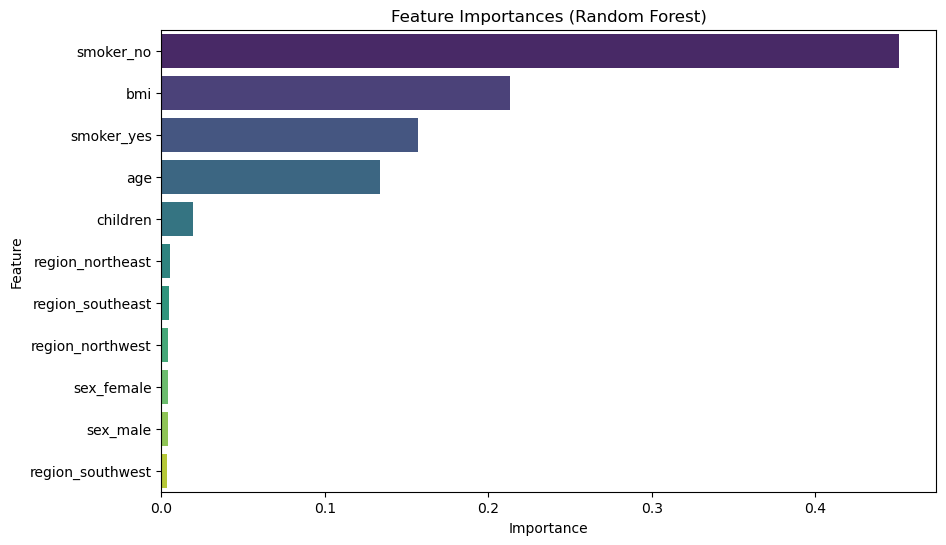

In [13]:
rf_model = rf_pipeline.named_steps['regressor']
feature_names = preprocessor.transformers_[0][2] + list(
    rf_pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out()
)
feature_importances = rf_model.feature_importances_

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importances (Random Forest)')
plt.show()


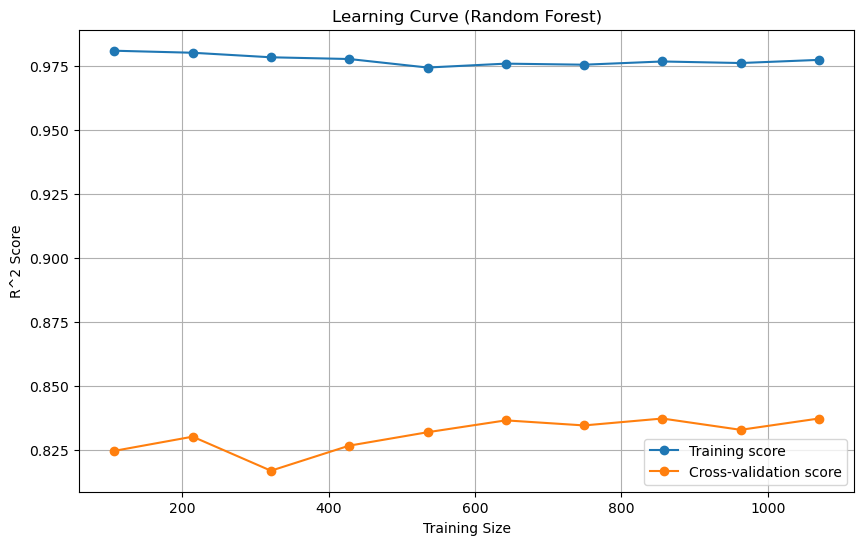

In [12]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    rf_pipeline, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='r2', n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training score', marker='o')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score', marker='o')
plt.title('Learning Curve (Random Forest)')
plt.xlabel('Training Size')
plt.ylabel('R^2 Score')
plt.legend()
plt.grid()
plt.show()


In [14]:
import joblib

# Save the trained Random Forest model
joblib.dump(rf_pipeline, 'insurance_rf_model.pkl')

# Save the preprocessed dataset
processed_data = preprocessor.fit_transform(X)
processed_df = pd.DataFrame(processed_data, columns=feature_names)
processed_df.to_csv('preprocessed_insurance_data.csv', index=False)


In [15]:
import os
print(os.path.exists('insurance_rf_model.pkl'))


True
